# Week 10 Lab Assignment: Decision Analysis, Model Comparison, and Ensemble Models

### Objective
In this lab, you will use decision analytic tools to frame a business problem, analyze alternatives, compare different models, and implement ensemble models to improve decision-making.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: Scikit-learn, Pandas, Numpy, Matplotlib, and Seaborn.

In [1]:
# Install necessary packages
%pip install scikit-learn pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, decision analysis, model comparison, and visualization.


In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

### 3. Define a Business Problem
**Objective:** Choose a relevant business problem and set clear objectives and decision criteria.

**Tasks:**
1. Define the business problem (e.g., customer churn prediction).
2. Set objectives and decision criteria (e.g., minimize customer churn rate, maximize retention).

**Business Problem:** Predict whether a customer will churn (leave the company) based on their characteristics and past behavior.

**Objective:** Use predictive modeling to identify customers at high risk of churn so that targeted retention strategies can be implemented.

### 4. Load and Explore Dataset
**Objective:** Gain a preliminary understanding of the dataset to be used for decision analysis.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns.

In [3]:
# Load the dataset
df = pd.read_csv('customer_churn_data.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())

   CustomerID  Age  Gender  Tenure  MonthlyCharges  TotalCharges  \
0           1   45    Male      12           70.35        804.15   
1           2   34  Female      24           56.95       1354.80   
2           3   23  Female       5           29.85        149.15   
3           4   57  Female      15          104.75       1571.65   
4           5   42    Male      36           53.85       1938.75   

  InternetService        Contract              PaymentMethod Churn  
0     Fiber optic  Month-to-month           Electronic check   Yes  
1             DSL        One year  Bank transfer (automatic)    No  
2             DSL  Month-to-month               Mailed check   Yes  
3     Fiber optic  Month-to-month           Electronic check    No  
4             DSL        Two year    Credit card (automatic)    No  
CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
TotalCharges       0
InternetService    0
Contract           0
PaymentMe

### 5. Data Preparation
**Objective:** Prepare the data for modeling by handling missing values, encoding categorical variables, and splitting into training and test sets.

**Tasks:**
1. **Handle Missing Values:** Fill or drop missing values as appropriate.
2. **Encode Categorical Variables:** Use one-hot encoding or label encoding for categorical features.
3. **Split Data:** Split the data into training and test sets.

In [4]:
# Example of data preparation steps
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

# Check the column names
print(df.columns)

# Split the data into features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Index(['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')
Training set size: (21, 13)
Test set size: (9, 13)


### 6. Create a Decision Tree
**Objective:** Build a decision tree to explore different decision paths and analyze potential outcomes.

**Tasks:**
1. **Train a Decision Tree:** Use the training data to train a decision tree model.
2. **Visualize the Decision Tree:** Plot the decision tree to understand decision paths.

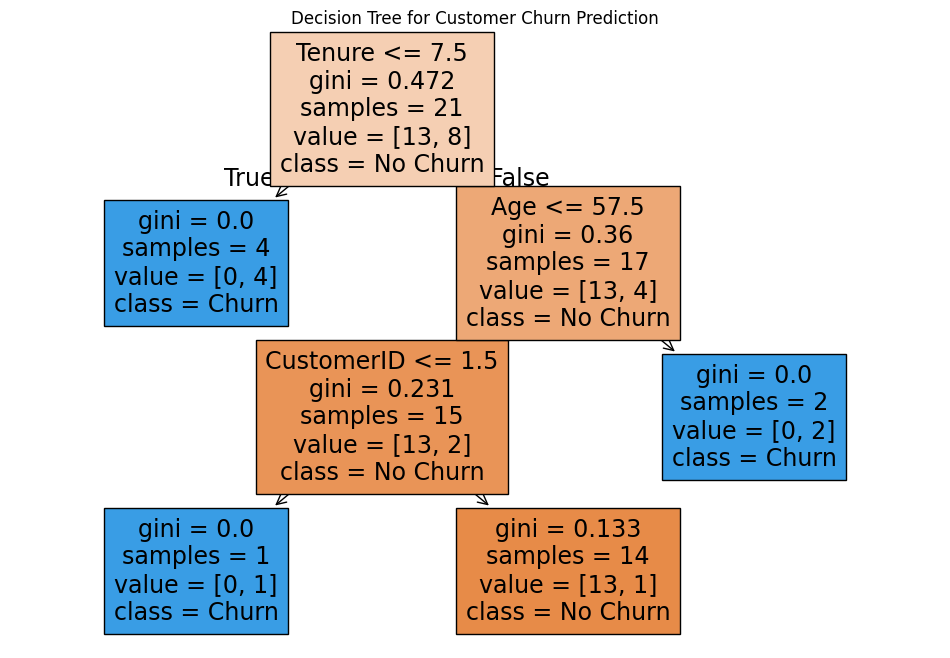

In [5]:
# Train a Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.title('Decision Tree for Customer Churn Prediction')
plt.show()

### 7. Model Comparison
**Objective:** Compare different models using performance metrics to determine the best model for the decision-making process.

**Tasks:**
1. **Train Different Models:** Use Random Forest, Gradient Boosting, and other models for comparison.
2. **Evaluate Models:** Use accuracy, precision, recall, and F1 score to compare model performance.

In [6]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate model performance
print('Random Forest Classification Report')
print(classification_report(y_test, rf_pred))

print('Gradient Boosting Classification Report')
print(classification_report(y_test, gb_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

       False       0.75      0.75      0.75         4
        True       0.80      0.80      0.80         5

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9

Gradient Boosting Classification Report
              precision    recall  f1-score   support

       False       0.40      0.50      0.44         4
        True       0.50      0.40      0.44         5

    accuracy                           0.44         9
   macro avg       0.45      0.45      0.44         9
weighted avg       0.46      0.44      0.44         9



### 8. Implement Ensemble Models
**Objective:** Use ensemble techniques to combine models and improve decision-making accuracy.

**Tasks:**
1. **Use Voting Classifier:** Combine Decision Tree, Random Forest, and Gradient Boosting using Voting Classifier.
2. **Evaluate Ensemble Model:** Compare the ensemble model's performance with individual models.

Ensemble Model (Voting Classifier) Classification Report
              precision    recall  f1-score   support

       False       0.75      0.75      0.75         4
        True       0.80      0.80      0.80         5

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



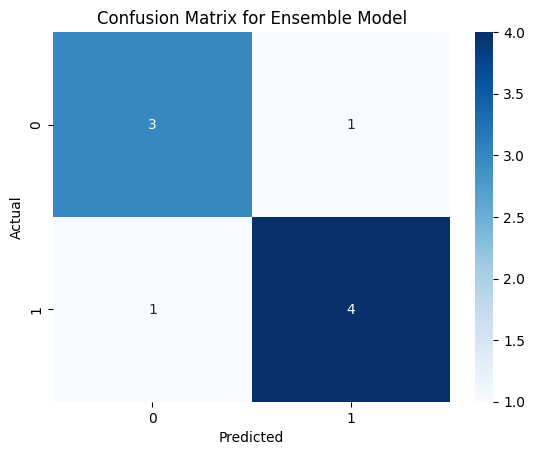

In [7]:
# Use Voting Classifier to combine models
voting_clf = VotingClassifier(
    estimators=[('dt', tree_model), ('rf', rf_model), ('gb', gb_model)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Predict using the ensemble model
voting_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model
print('Ensemble Model (Voting Classifier) Classification Report')
print(classification_report(y_test, voting_pred))

# Confusion Matrix for Ensemble Model
conf_matrix = confusion_matrix(y_test, voting_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 9. Summary and Discussion
**Objective:** Reflect on the effectiveness of different models and ensemble techniques and discuss their applications in business decision-making.

**Tasks:**
1. **Compare Model Performance:** Discuss the results from individual models and the ensemble model.
2. **Business Implications:** Describe how model comparison and ensemble techniques can improve business decisions.

### 10. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code, visualizations, and model evaluations.
- A brief report (1-2 paragraphs) summarizing the findings, comparing model performance, and discussing the use of ensemble models in decision-making.

**Deadline:** Submit your completed notebook and report to the course portal by the end of class.